Projeto: Previsão da Demanda Mensal de Energia Elétrica em Indústria de Alimentos

In [1]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - -------------------------------------- 30.7/625.1 kB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 122.9/625.1 kB 1.8 MB/s eta 0:00:01
   ------------------------- -------------- 399.4/625.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.7 MB 11.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 9.1 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.7 MB 9.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.7 MB 9.1 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 10.0 MB/s eta 0:00:01
   

In [60]:
# Imports
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.graph_objects as go
import pmdarima as pm
import statsmodels as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SARIMAX, AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
csv_file_path = 'dataset/dataset.csv'

In [4]:
df = pd.read_csv(csv_file_path)

In [5]:
df.head()

,Data,ConsumoEnergia,Temperatura
0,2014-01-01,974.560802,29.238040
1,2014-02-01,1037.744229,24.387199
2,2014-03-01,1053.282839,24.914687
3,2014-04-01,1024.963318,14.073665
4,2014-05-01,1009.423152,21.545080


In [6]:
df.dtypes

Data               object
ConsumoEnergia    float64
Temperatura       float64
dtype: object

In [7]:
# Converte Coluna Data para Datetime
df['Data'] = pd.to_datetime(df['Data'], format='mixed')

In [8]:
df.dtypes

Data              datetime64[ns]
ConsumoEnergia           float64
Temperatura              float64
dtype: object

In [9]:
df.set_index('Data', inplace=True)

In [9]:
df

,ConsumoEnergia,Temperatura
Data,,
2014-01-01,974.560802,29.238040
2014-02-01,1037.744229,24.387199
2014-03-01,1053.282839,24.914687
2014-04-01,1024.963318,14.073665
2014-05-01,1009.423152,21.545080
...,...,...
2024-08-01,993.110004,17.962098
2024-09-01,986.023824,13.136002
2024-10-01,1005.797721,24.720930


In [10]:
df = pd.read_csv(csv_file_path)
print(df.columns)
print(df.head())


Index(['Data', 'ConsumoEnergia', 'Temperatura'], dtype='object')
         Data  ConsumoEnergia  Temperatura
0  2014-01-01      974.560802    29.238040
1  2014-02-01     1037.744229    24.387199
2  2014-03-01     1053.282839    24.914687
3  2014-04-01     1024.963318    14.073665
4  2014-05-01     1009.423152    21.545080


In [11]:
print(df.index)

RangeIndex(start=0, stop=132, step=1)


In [59]:
# Criar gráfico interativo
fig = go.Figure()

# Linha de Consumo de Energia
fig.add_trace(go.Scatter(
    x=df['Data'], y=df['ConsumoEnergia'],
    mode='lines+markers',
    name='Consumo de Energia (kWh)',
    line=dict(color='blue'),
    yaxis='y1'
))

# Linha de Temperatura
fig.add_trace(go.Scatter(
    x=df['Data'], y=df['Temperatura'],
    mode='lines+markers',
    name='Temperatura (°C)',
    line=dict(color='orange'),
    yaxis='y2'
))

# Layout com dois eixos y
fig.update_layout(
    title='Série Temporal Interativa: Consumo de Energia vs Temperatura',
    xaxis=dict(title='Data'),
    yaxis=dict(
        title='Consumo de Energia (kWh)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Temperatura (°C)',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


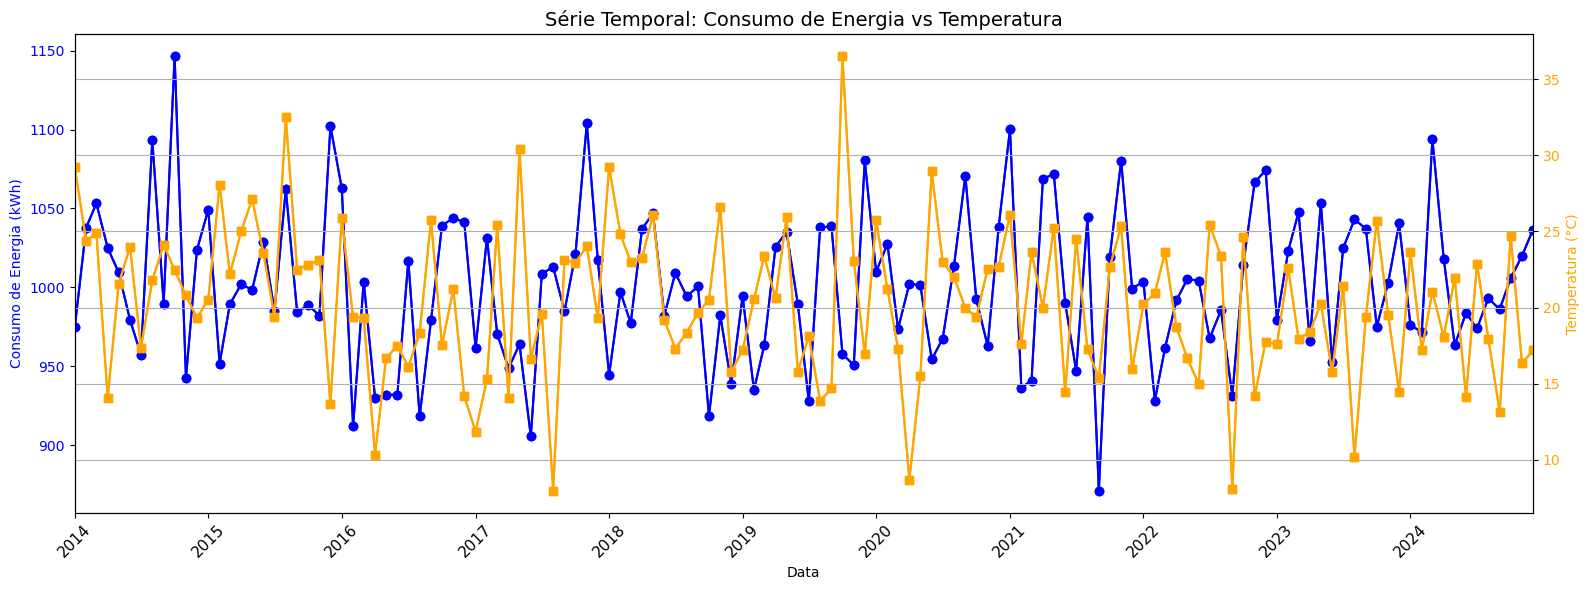

In [86]:
# Criar gráfico com dois eixos
fig, ax1 = plt.subplots(figsize=(16, 6))

# Eixo 1 - Consumo de Energia
ax1.plot(df['Data'], df['ConsumoEnergia'], marker='o', color='blue', label='Consumo de Energia (kWh)')
ax1.set_xlabel('Data')
ax1.set_ylabel('Consumo de Energia (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo 2 - Temperatura
ax2 = ax1.twinx()
ax2.plot(df['Data'], df['Temperatura'], marker='s', color='orange', label='Temperatura (°C)')
ax2.set_ylabel('Temperatura (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


# 🔧 Use sempre a coluna 'Data' como eixo x
ax1.plot(df['Data'], df['ConsumoEnergia'], marker='o', color='blue', label='Consumo de Energia (kWh)')
ax2.plot(df['Data'], df['Temperatura'], marker='s', color='orange', label='Temperatura (°C)')

# ✅ Eixo x bem definido
ax1.set_xlim(df['Data'].min(), df['Data'].max())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Ex: 2014
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Ticks mensais
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, fontsize=11)

# Título e layout
plt.title('Série Temporal: Consumo de Energia vs Temperatura', fontsize=14)
fig.tight_layout()
plt.grid(True)
plt.show()


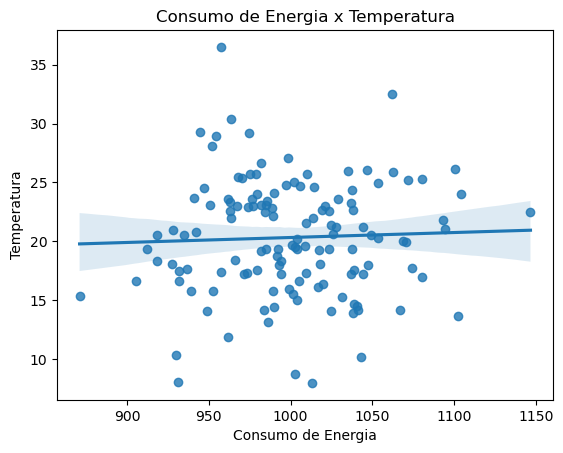

In [50]:
#Efeito da campanha de marketing ativa
sns.regplot(x='ConsumoEnergia', y='Temperatura', data=df)
plt.title('Consumo de Energia x Temperatura')
plt.xlabel('Consumo de Energia')
plt.ylabel('Temperatura')
plt.show()

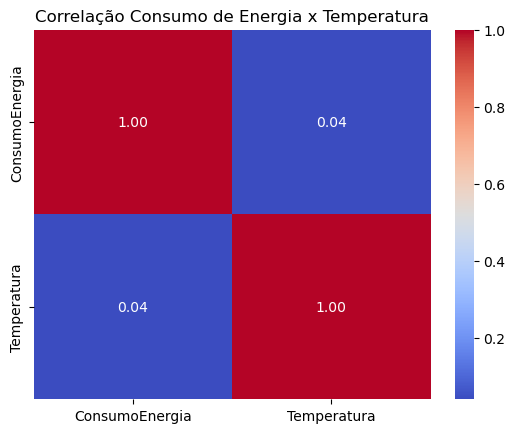

In [47]:
# Correlação entre variáveis numéricas
corr = df[['ConsumoEnergia','Temperatura']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação Consumo de Energia x Temperatura')
plt.show()

In [88]:
#Verificar série é estacionaria
# Função para testar a estacionaridade (Dickey Fullher)
def testa_estacionaridade(serie, window = 12, title = 'Estatísticas Móveis e Teste Dickey-Fuller'):
    """
    Função para testar a estacionaridade de uma série temporal.
    
    Parâmetros:
    - serie: pandas.Series. Série temporal a ser testada.
    - window: int. Janela para cálculo das estatísticas móveis.
    - title: str. Título para os gráficos.
    """
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = window).mean()
    rolstd = serie.rolling(window = window).std()

    # Plot das estatísticas móveis
    plt.figure(figsize = (14, 6))
    plt.plot(serie, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    plt.plot(rolstd, color = 'black', label = 'Desvio Padrão Móvel')
    plt.legend(loc = 'best')
    plt.title(title)
    plt.show(block = False)
    
    # Teste Dickey-Fuller
    print('\nResultado do Teste Dickey-Fuller:')
    dfteste = adfuller(serie, autolag = 'AIC')
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste', 
                                               'Valor-p', 
                                               'Número de Lags Consideradas', 
                                               'Número de Observações Usadas'])
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)' % key] = value
        
    print(dfsaida)
    
    # Conclusão baseada no valor-p
    if dfsaida['Valor-p'] > 0.05:
        print('\nConclusão:\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente não é estacionária.')
    else:
        print('\nConclusão:\nO valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente é estacionária.')

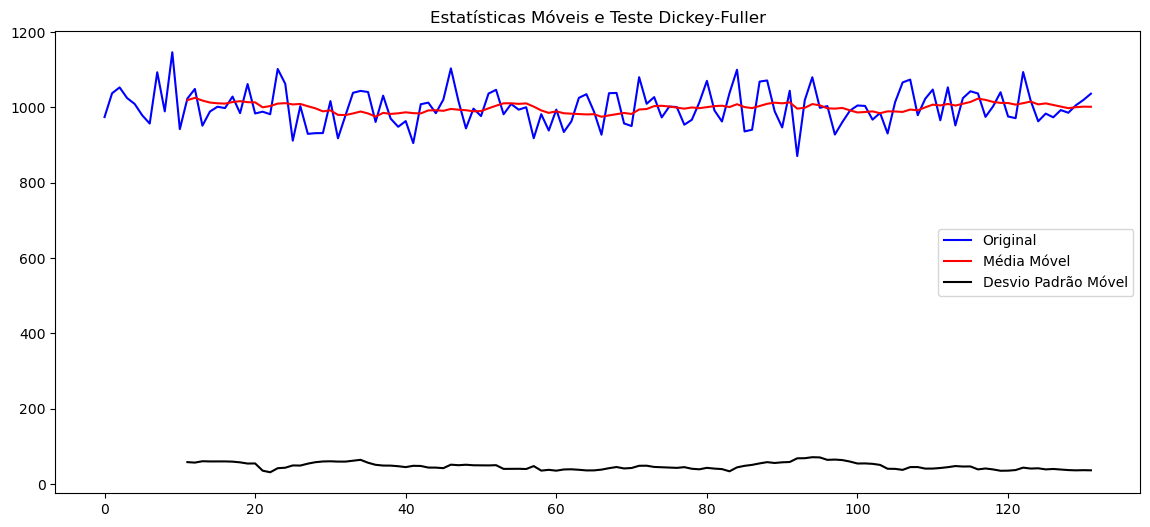


Resultado do Teste Dickey-Fuller:
Estatística do Teste           -9.011734e+00
Valor-p                         6.099877e-15
Número de Lags Consideradas     1.000000e+00
Número de Observações Usadas    1.300000e+02
Valor Crítico (1%)             -3.481682e+00
Valor Crítico (5%)             -2.884042e+00
Valor Crítico (10%)            -2.578770e+00
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [90]:
testa_estacionaridade(df['ConsumoEnergia'])

In [14]:
# Separa a variável exógena
exog = df[['Temperatura']]

In [15]:
np.array([exog])

array([[[29.23804037],
        [24.38719874],
        [24.91468665],
        [14.07366459],
        [21.54508038],
        [23.99667435],
        [17.35575542],
        [21.80366803],
        [24.12051971],
        [22.46561227],
        [20.7973666 ],
        [19.31959066],
        [20.52626874],
        [28.07298046],
        [22.1797555 ],
        [25.02113012],
        [27.10441318],
        [23.55232323],
        [19.38561908],
        [32.48465308],
        [22.47430406],
        [22.82129098],
        [23.12514781],
        [13.64908502],
        [25.85968928],
        [19.36318323],
        [19.3400064 ],
        [10.34288867],
        [16.66397198],
        [17.50740153],
        [16.11757151],
        [18.33327967],
        [25.73715459],
        [17.53529368],
        [21.18780187],
        [14.18935769],
        [11.85416514],
        [15.29688729],
        [25.41869221],
        [14.06109   ],
        [30.38437643],
        [16.62804717],
        [19.59424704],
        [ 7

In [16]:
# Divide os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(df) * 0.8)
df_treino, df_teste = df.iloc[:train_size], df.iloc[train_size:]
exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]

#### Previsões com modelo ARIMA com a sazonalidade e variável Exógena.

In [30]:
# Otimização dos hiperparâmetros usando Auto ARIMA com variável exógena nos dados de treino
auto_modelo_dsa = pm.auto_arima(df_treino['ConsumoEnergia'], 
                                exogenous = exog_train,
                                seasonal = True, 
                                m = 12, 
                                start_p = 0, 
                                start_d = 0, 
                                start_q = 0,
                                max_p = 3, 
                                max_d = 3, 
                                max_q = 3, 
                                start_P = 0, 
                                start_D = 0, 
                                start_Q = 0,
                                max_P = 3, 
                                max_D = 3,
                                max_Q = 3,
                                max_order = 10,
                                information_criterion = 'aic',
                                trace = True, 
                                stepwise = False,
                                error_action = 'ignore')


 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1120.503, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1118.607, Time=0.10 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1118.156, Time=0.19 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1119.782, Time=0.37 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1122.508, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1120.609, Time=0.26 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1120.156, Time=0.25 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1121.782, Time=0.56 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1118.104, Time=0.44 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1120.146, Time=0.48 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1121.957, Time=0.40 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1123.848, Time=1.27 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1121.203, Time=1.21 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1121.989, Time=1.10 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=1.62 sec


In [164]:
# Mostra o melhor conjunto de parâmetros
print(auto_modelo_dsa.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0, 12)   Log Likelihood                -696.109
Date:                  seg, 14 jul 2025   AIC                           1400.219
Time:                          16:32:35   BIC                           1411.750
Sample:                               0   HQIC                          1404.905
                                  - 132                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    999.9512    187.951      5.320      0.000     631.575    1368.328
ar.S.L12       0.1683      0.136      1.237      0.216      -0.098       0.435
ar.S.L24      -0.1687      0.134    

In [208]:
# Previsões usando os dados históricos (in-sample)
previsoes_treino = auto_modelo_dsa.predict_in_sample(exogenous = exog_train)

In [209]:
previsoes_treino

0       999.551289
1       999.551289
2       999.551289
3       999.551289
4       999.551289
          ...     
127    1009.230365
128    1017.452070
129     992.934431
130     988.779871
131     993.864992
Name: predicted_mean, Length: 132, dtype: float64

In [210]:
print(df_treino['ConsumoEnergia'].shape)
print(previsoes_treino.shape)

(105,)
(132,)


In [211]:
previsoes_treino_alinhado = previsoes_treino[:105]
mae_train = mean_absolute_error(df_treino['ConsumoEnergia'], previsoes_treino_alinhado)
mse_train = mean_squared_error(df_treino['ConsumoEnergia'], previsoes_treino_alinhado)
rmse_train = np.sqrt(mse_train)

In [212]:
print(f'Mean Absolute Error (MAE) com dados de treino: {mae_train}')
print(f'Mean Squared Error (MSE) com dados de treino: {mse_train}')
print(f'Mean Squared Error (RMSE) com dados de treino: {rmse_train}')

Mean Absolute Error (MAE) com dados de treino: 37.82079549228784
Mean Squared Error (MSE) com dados de treino: 2295.43210764006
Mean Squared Error (RMSE) com dados de treino: 47.91066799409146


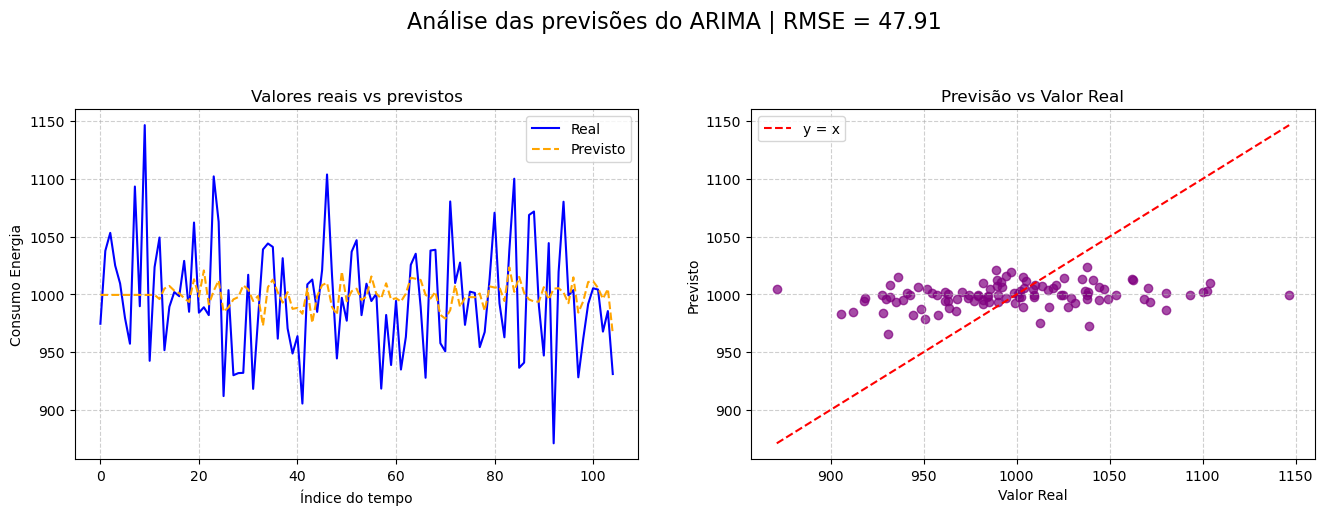

In [213]:
# Plot RMSE Geral:

# calcular novamente para garantir
mae_train = mean_absolute_error(df_treino['ConsumoEnergia'], previsoes_treino_alinhado)
mse_train = mean_squared_error(df_treino['ConsumoEnergia'], previsoes_treino_alinhado)
rmse_train = np.sqrt(mse_train)

# criar a figura
plt.figure(figsize=(16,10))
plt.suptitle(f'Análise das previsões do ARIMA | RMSE = {rmse_train:.2f}', fontsize=16)

# ------------------------------
# 1. Linha real vs previsto
plt.subplot(2,2,1)
plt.plot(df_treino['ConsumoEnergia'], label='Real', color='blue')
plt.plot(previsoes_treino_alinhado, label='Previsto', color='orange', linestyle='--')
plt.title('Valores reais vs previstos')
plt.xlabel('Índice do tempo')
plt.ylabel('Consumo Energia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)


# 2. Dispersão previsão vs real
plt.subplot(2,2,2)
plt.scatter(df_treino['ConsumoEnergia'], previsoes_treino_alinhado, color='purple', alpha=0.7)
plt.plot([df_treino['ConsumoEnergia'].min(), df_treino['ConsumoEnergia'].max()],
         [df_treino['ConsumoEnergia'].min(), df_treino['ConsumoEnergia'].max()],
         'r--', label='y = x')
plt.title('Previsão vs Valor Real')
plt.xlabel('Valor Real')
plt.ylabel('Previsto')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

In [214]:
# Previsões usando os dados de teste (out-of-sample)
previsoes_teste = auto_modelo_dsa.predict(n_periods = len(df_teste), exogenous = exog_test)

In [ ]:
previsoes_teste

132     998.983561
133     990.862381
134    1007.368299
135    1008.348787
136     984.339301
137    1004.859380
138     990.971787
139     991.135714
140     990.920579
141    1004.734353
142    1002.421909
143     998.884227
144    1003.410242
145    1002.798071
146     984.910744
147     997.881236
148    1003.100429
149    1003.103541
150    1002.433491
151     999.221586
152    1000.380842
153     999.369821
154     996.608908
155     993.185115
156    1000.296542
157    1001.563584
158     995.768476
dtype: float64

In [215]:
# Calcula o MAE e o MSE entre as previsões de teste e os valores reais de teste
mae_test = mean_absolute_error(df_teste['ConsumoEnergia'], previsoes_teste)
mse_test = mean_squared_error(df_teste['ConsumoEnergia'], previsoes_teste)
rmse_test = np.sqrt(mse_test)

In [216]:
print(f'Mean Absolute Error (MAE) com dados de teste: {mae_test}')
print(f'Mean Squared Error (MSE) com dados de teste: {mse_test}')
print(f'Mean Squared Error (RMSE) com dados de treino: {rmse_test}')

Mean Absolute Error (MAE) com dados de teste: 32.97942025530543
Mean Squared Error (MSE) com dados de teste: 1567.6104456241942
Mean Squared Error (RMSE) com dados de treino: 39.59306057409801


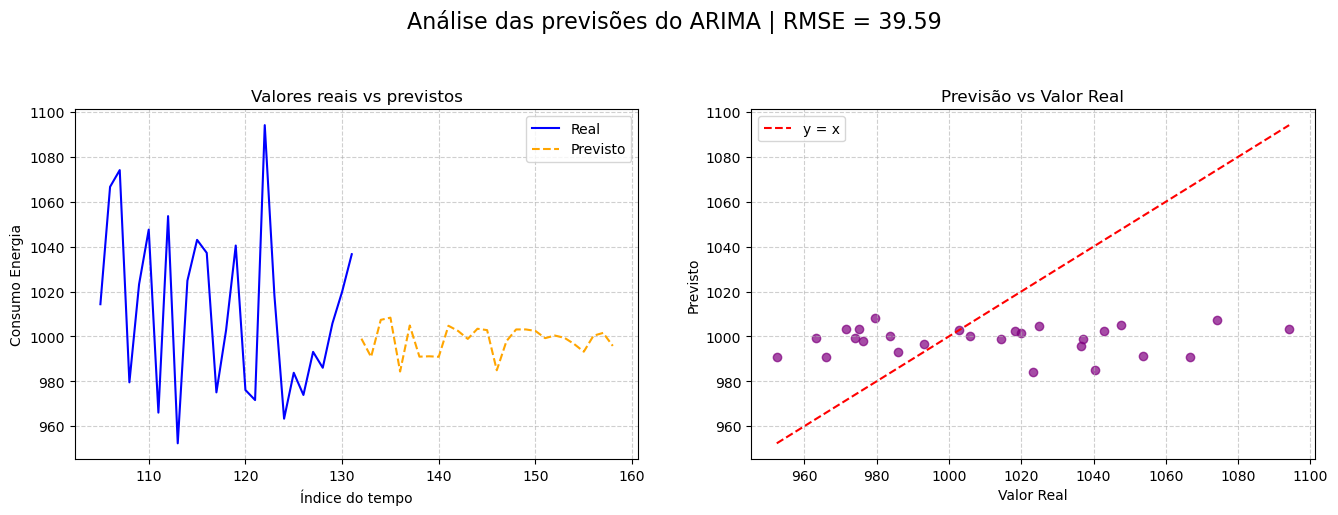

In [217]:
# Plot RMSE Geral:

# criar a figura
plt.figure(figsize=(16,10))
plt.suptitle(f'Análise das previsões do ARIMA | RMSE = {rmse_test:.2f}', fontsize=16)

# ------------------------------
# 1. Linha real vs previsto
plt.subplot(2,2,1)
plt.plot(df_teste['ConsumoEnergia'], label='Real', color='blue')
plt.plot(previsoes_teste, label='Previsto', color='orange', linestyle='--')
plt.title('Valores reais vs previstos')
plt.xlabel('Índice do tempo')
plt.ylabel('Consumo Energia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)


# 2. Dispersão previsão vs real
plt.subplot(2,2,2)
plt.scatter(df_teste['ConsumoEnergia'], previsoes_teste, color='purple', alpha=0.7)
plt.plot([df_teste['ConsumoEnergia'].min(), df_teste['ConsumoEnergia'].max()],
         [df_teste['ConsumoEnergia'].min(), df_teste['ConsumoEnergia'].max()],
         'r--', label='y = x')
plt.title('Previsão vs Valor Real')
plt.xlabel('Valor Real')
plt.ylabel('Previsto')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

In [218]:
# Reajustando o modelo com todos os dados para preparar para previsão futura
auto_modelo_dsa.fit(df['ConsumoEnergia'], exogenous = exog)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

In [219]:
# Simulação de temperatura futura para os próximos 12 meses (2025)
future_exog = np.random.normal(loc = 20, scale = 5, size = 12).reshape(-1, 1)  

In [220]:
# Gerando previsões para os próximos 12 meses de 2025
pred_forecast = auto_modelo_dsa.predict(n_periods = 12, exogenous = future_exog, return_conf_int = True)

In [221]:
pred_forecast

(132     998.983561
 133     990.862381
 134    1007.368299
 135    1008.348787
 136     984.339301
 137    1004.859380
 138     990.971787
 139     991.135714
 140     990.920579
 141    1004.734353
 142    1002.421909
 143     998.884227
 dtype: float64,
 array([[ 893.41004882, 1104.5570728 ],
        [ 885.2888694 , 1096.43589338],
        [ 901.79478684, 1112.94181083],
        [ 902.77527522, 1113.92229921],
        [ 878.76578915, 1089.91281314],
        [ 899.28586757, 1110.43289156],
        [ 885.39827507, 1096.54529905],
        [ 885.56220166, 1096.70922564],
        [ 885.3470669 , 1096.49409089],
        [ 899.16084093, 1110.30786491],
        [ 896.84839659, 1107.99542058],
        [ 893.31071543, 1104.45773942]]))

In [223]:
# Gerando datas para 2025
future_dates_2025 = pd.date_range(start="2025-01-01", periods = 12, freq = 'MS')

In [224]:
future_dates_2025

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [232]:
print(type(pred_forecast))
print(type(pred_forecast[0]))
print(pred_forecast[0])

<class 'tuple'>
<class 'pandas.core.series.Series'>
132     998.983561
133     990.862381
134    1007.368299
135    1008.348787
136     984.339301
137    1004.859380
138     990.971787
139     991.135714
140     990.920579
141    1004.734353
142    1002.421909
143     998.884227
dtype: float64


In [233]:
previsoes_2025 = pd.Series(pred_forecast[0], index=future_dates_2025)
print(previsoes_2025.isna().sum())  # Checa quantos NaN

12


In [234]:
previsoes_validas = pred_forecast[0][~np.isnan(pred_forecast[0])]
datas_validas = future_dates_2025[:len(previsoes_validas)]
previsoes_2025 = pd.Series(previsoes_validas, index=datas_validas)

In [248]:
# Separando previsões e intervalo de confiança
valores_previstos = pred_forecast[0]
ic_inferior = pred_forecast[1][:, 0]
ic_superior = pred_forecast[1][:, 1]

intervalos_conf_2025 = pd.DataFrame(pred_forecast[1], index = future_dates_2025, columns = ['ic_inferior', 'ic_superior'])

# Criando série com datas
future_dates_2025 = pd.date_range(start="2025-01-01", periods=12, freq='MS')
serie_prevista = pd.Series(valores_previstos, index=future_dates_2025)

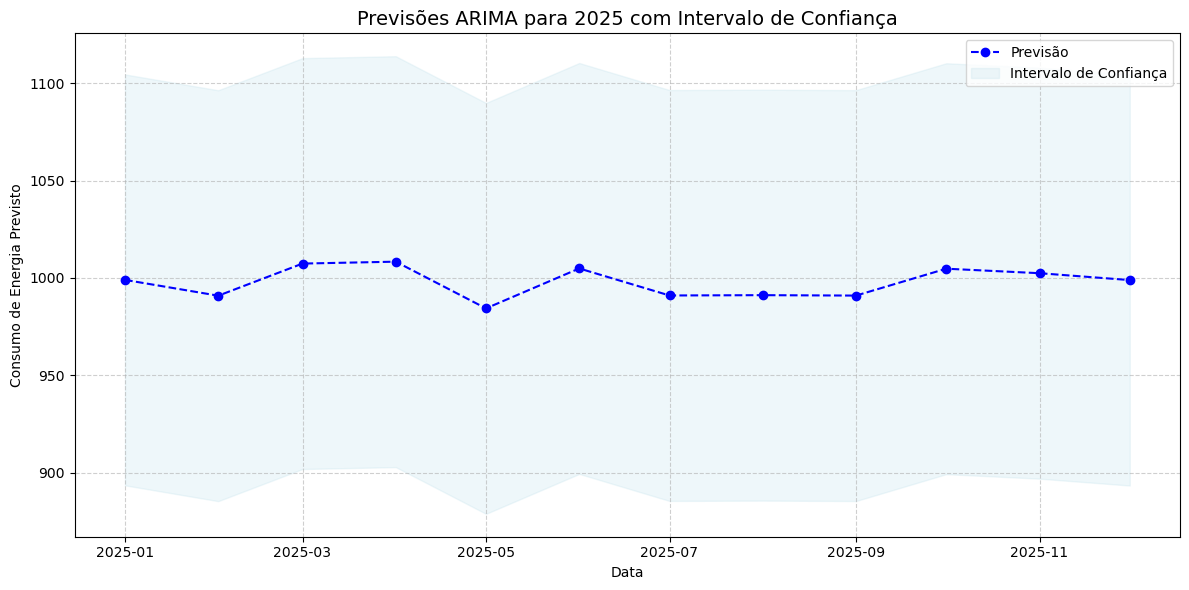

In [259]:
plt.figure(figsize=(12, 6))

# Previsões
plt.plot(serie_prevista.index, valores_previstos, label='Previsão', color='blue', marker='o', linestyle='--')

# Banda de confiança
plt.fill_between(future_dates_2025, ic_inferior, ic_superior, color='lightblue', alpha=0.2, label='Intervalo de Confiança')

plt.title('Previsões ARIMA para 2025 com Intervalo de Confiança', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Consumo de Energia Previsto')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

# pred_forecast = auto_modelo_dsa.predict(n_periods=12, exogenous=future_exog, return_conf_int=True)
valores_previstos = pred_forecast[0]
ic_inferior = pred_forecast[1][:, 0]
ic_superior = pred_forecast[1][:, 1]

# Datas para 2025
future_dates_2025 = pd.date_range(start="2025-01-01", periods=12, freq='MS')

# Criando a figura
fig = go.Figure()

# ➤ Banda de confiança (área entre inferior e superior)
fig.add_trace(go.Scatter(
    x=future_dates_2025.tolist() + future_dates_2025[::-1].tolist(),
    y=ic_superior.tolist() + ic_inferior[::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0, 100, 255, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo='skip',
    showlegend=True,
    name='Intervalo de Confiança'
))

# ➤ Linha de previsões
fig.add_trace(go.Scatter(
    x=future_dates_2025,
    y=valores_previstos,
    mode='lines+markers',
    name='Previsão',
    line=dict(color='blue'),
    marker=dict(color='blue')
))

# ➤ Layout elegante
fig.update_layout(
    title='Previsões ARIMA para 2025 com Intervalo de Confiança',
    xaxis_title='Mês',
    yaxis_title='Consumo de Energia Previsto',
    xaxis=dict(tickformat='%b %Y'),
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=40, r=40, t=60, b=40),
    hovermode='x unified'
)

fig.show()

In [251]:
print(f"Previsões para 2025:\n{previsoes_validas}")  # Previsões
print(f"Intervalos de confiança para as previsões:\n{intervalos_conf_2025}")  # Intervalos de confiança

Previsões para 2025:
132     998.983561
133     990.862381
134    1007.368299
135    1008.348787
136     984.339301
137    1004.859380
138     990.971787
139     991.135714
140     990.920579
141    1004.734353
142    1002.421909
143     998.884227
dtype: float64
Intervalos de confiança para as previsões:
            ic_inferior  ic_superior
2025-01-01   893.410049  1104.557073
2025-02-01   885.288869  1096.435893
2025-03-01   901.794787  1112.941811
2025-04-01   902.775275  1113.922299
2025-05-01   878.765789  1089.912813
2025-06-01   899.285868  1110.432892
2025-07-01   885.398275  1096.545299
2025-08-01   885.562202  1096.709226
2025-09-01   885.347067  1096.494091
2025-10-01   899.160841  1110.307865
2025-11-01   896.848397  1107.995421
2025-12-01   893.310715  1104.457739


In [247]:
# Salvar previsões
df_previsoes = pd.DataFrame(previsoes_validas)
df_previsoes.to_csv("previsoes_2025.csv", index=False)
print("Arquivo previsoes.csv salvo com sucesso.")

Arquivo previsoes.csv salvo com sucesso.
